In [1]:
import sys
sys.path.append('../..'); sys.path.append('../'); 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import utils
import imageio

In [2]:
dat = np.load('imgs_size/RMTS_size_pretrain.npz')
X = dat['x']
y = dat['y']
X = 255 - X
X = np.expand_dims(X, axis=4)
print(X.shape, y.shape)

(200, 2, 32, 32, 1) (200,)


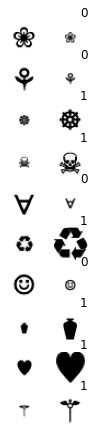

In [3]:
def display_sample(X, y, to_show=5):
    seq_len = int(X.shape[1]/2)
    fig, axarr = plt.subplots(to_show, 2*seq_len, figsize=(1.5*seq_len, .75*to_show))
    plt.rcParams['axes.titlepad'] = -14  
    for i in range(to_show):
        ind = np.random.choice(range(len(X)), 1)[0]
        for j in range(2*seq_len):
            axarr[i,j].imshow(X[i,j], cmap='gray_r')
            axarr[i,j].axis('off')
            if (j == 2*seq_len-1):
                axarr[i,j].set_title('%d' % y[i], loc='right')
    plt.show()


display_sample(X, y, to_show=10)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
X_train.shape, X_test.shape

((180, 2, 32, 32, 1), (20, 2, 32, 32, 1))

In [5]:
from simplest_abstractor import SimplestAbstractorCNN

In [6]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, name='binary_crossentropy')
create_opt = lambda : tf.keras.optimizers.Adam(learning_rate=0.001)

cnn_abstractor = SimplestAbstractorCNN(num_classes=2, sequence_len=2, symbol_dim=10, embedding_dim=64)
cnn_abstractor.compile(loss='binary_crossentropy', optimizer=create_opt(), metrics=['binary_accuracy'])
cnn_abstractor(X_train[:32])
cnn_abstractor.summary()



Model: "simplest_abstractor_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_encoder (CnnEncoder)    multiple                  104704    
                                                                 
 cnn_embedder (TimeDistribut  multiple                 104704    
 ed)                                                             
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 query_projection (Dense)    multiple                  4160      
                                                                 
 key_projection (Dense)      multiple                  4160      
                                                                 
 hidden_layer (Dense)        multiple                  672       
                                           

In [7]:
history = cnn_abstractor.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=100, verbose=1, batch_size=128)

Epoch 1/100
2/2 [==============================] - 5s 1s/step - loss: 0.7064 - binary_accuracy: 0.5167 - val_loss: 0.7000 - val_binary_accuracy: 0.5167
Epoch 2/100
2/2 [==============================] - 0s 121ms/step - loss: 0.6990 - binary_accuracy: 0.5167 - val_loss: 0.6932 - val_binary_accuracy: 0.5167
Epoch 3/100
2/2 [==============================] - 0s 106ms/step - loss: 0.6930 - binary_accuracy: 0.5167 - val_loss: 0.6875 - val_binary_accuracy: 0.5167
Epoch 4/100
2/2 [==============================] - 0s 104ms/step - loss: 0.6870 - binary_accuracy: 0.5167 - val_loss: 0.6828 - val_binary_accuracy: 0.5167
Epoch 5/100
2/2 [==============================] - 0s 92ms/step - loss: 0.6816 - binary_accuracy: 0.5167 - val_loss: 0.6786 - val_binary_accuracy: 0.5167
Epoch 6/100
2/2 [==============================] - 0s 115ms/step - loss: 0.6785 - binary_accuracy: 0.5167 - val_loss: 0.6747 - val_binary_accuracy: 0.5167
Epoch 7/100
2/2 [==============================] - 0s 84ms/step - loss: 0.

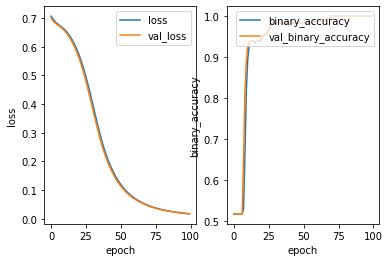

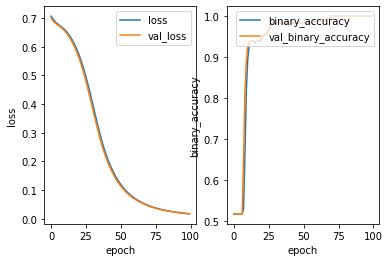

In [8]:
utils.plot_history(history, ('loss', 'binary_accuracy'))


In [9]:
out = cnn_abstractor(X_train)
yhat = np.array([int(o) for o in np.round(np.squeeze(out.numpy()))])
print('train accuracy: %.2f%%\n' % (100*np.mean(yhat==y_train)))

train accuracy: 100.00%



In [10]:
out = cnn_abstractor(X_test)
yhat = np.array([int(o) for o in np.round(np.squeeze(out.numpy()))])
100*np.mean(yhat==y_test)
print('test accuracy: %.2f%%\n' % (100*np.mean(yhat==y_test)))

test accuracy: 100.00%



In [11]:
out = cnn_abstractor.save_weights("larger_than_relation_weights")

In [12]:
model2 = SimplestAbstractorCNN(num_classes=2, sequence_len=2, symbol_dim=10, embedding_dim=64)
model2.compile(loss='binary_crossentropy', optimizer=create_opt(), metrics=['binary_accuracy'])
model2(X_train[:32])
model2.summary()
model2.load_weights("larger_than_relation_weights")


Model: "simplest_abstractor_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_encoder (CnnEncoder)    multiple                  104704    
                                                                 
 cnn_embedder (TimeDistribut  multiple                 104704    
 ed)                                                             
                                                                 
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 query_projection (Dense)    multiple                  4160      
                                                                 
 key_projection (Dense)      multiple                  4160      
                                                                 
 hidden_layer (Dense)        multiple                  672       
                                           

In [13]:
out = model2(X)
yhat = np.array([int(o) for o in np.round(np.squeeze(out.numpy()))])
print('Overall accuracy: %.2f%%\n' % (100*np.mean(yhat==y)))

Overall accuracy: 100.00%

